In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from scipy import signal
import scipy.fft
from acoustic_toolbox.cepstrum import real_cepstrum

In [2]:
N = 200
x = np.linspace(0, 1, N, endpoint=False)
sf = N
freqs = np.fft.rfftfreq(N, d=1/sf)
noise_level = 1e-12

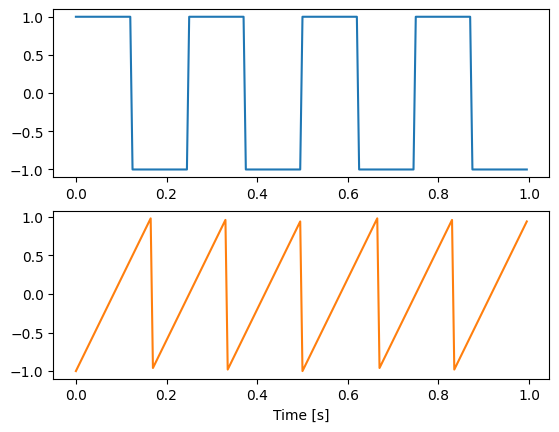

In [3]:
f_square = 4
f_sawtooth = 6

square = signal.square(2 * np.pi * f_square * x)
sawtooth = signal.sawtooth(2 * np.pi * f_sawtooth * x)

square = square + noise_level * np.random.randn(len(square))
sawtooth = sawtooth + noise_level * np.random.randn(len(sawtooth))

plt.subplot(211)
plt.plot(x, square)
plt.subplot(212)
plt.plot(x, sawtooth, color="tab:orange")
plt.xlabel("Time [s]")
plt.show()

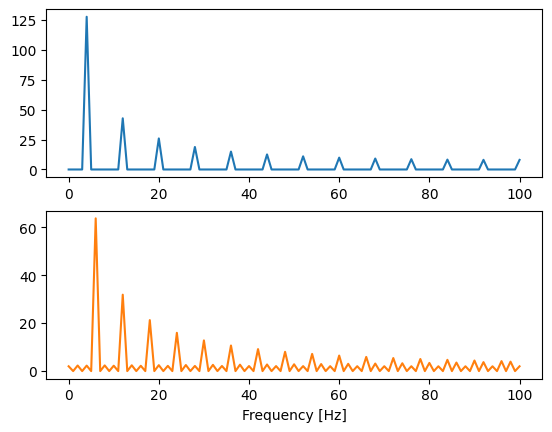

In [4]:
square_fft = scipy.fft.rfft(square)
sawtooth_fft = scipy.fft.rfft(sawtooth)

square_fft_abs = np.abs(square_fft)
sawtooth_fft_abs = np.abs(sawtooth_fft)

plt.subplot(211)
plt.plot(freqs, square_fft_abs)
plt.subplot(212)
plt.plot(freqs, sawtooth_fft_abs, color="tab:orange")
plt.xlabel("Frequency [Hz]")
plt.show()

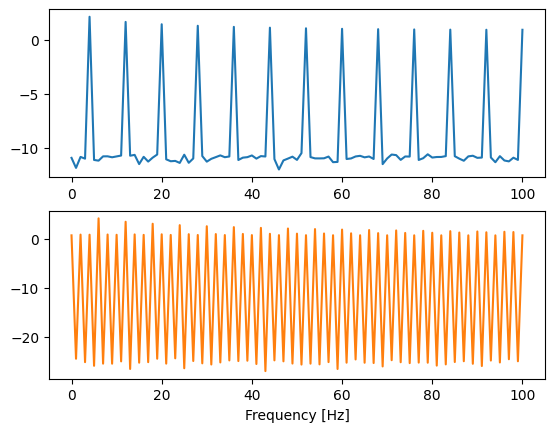

In [5]:
square_fft_log = np.log10(square_fft_abs)
sawtooth_fft_log = np.log(sawtooth_fft_abs)

plt.subplot(211)
plt.plot(freqs, square_fft_log)
plt.subplot(212)
plt.plot(freqs, sawtooth_fft_log, color="tab:orange")
plt.xlabel("Frequency [Hz]")
plt.show()

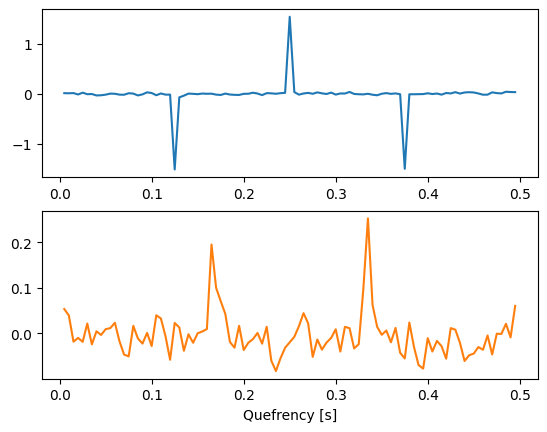

In [6]:
cepstrum_square = scipy.fft.irfft(square_fft_log)[1:N//2]
cepstrum_sawtooth = scipy.fft.irfft(sawtooth_fft_log)[1:N//2]

cepstrum_x = x[1:N//2]

plt.subplot(211)
plt.plot(cepstrum_x, cepstrum_square)
plt.subplot(212)
plt.plot(cepstrum_x, cepstrum_sawtooth, color="tab:orange")
plt.xlabel("Quefrency [s]")
plt.show()

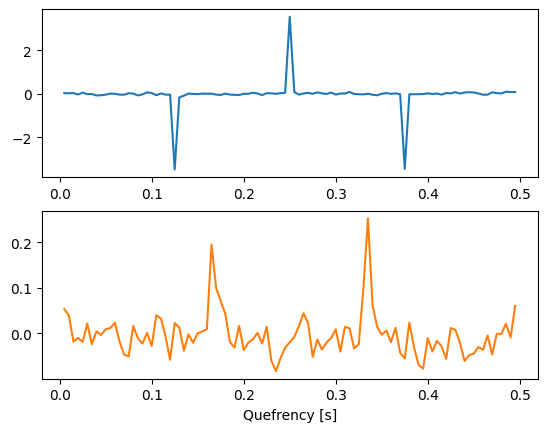

In [7]:
cepstrum_square = real_cepstrum(square)[1:N//2]
cepstrum_saw = real_cepstrum(sawtooth)[1:N//2]

plt.subplot(211)
plt.plot(cepstrum_x, cepstrum_square)

plt.subplot(212)
plt.plot(cepstrum_x, cepstrum_saw, color="tab:orange")
plt.xlabel("Quefrency [s]")

plt.show()